In [1]:
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Esercizio 3

Write a Python program that optimizes the Griewank Problem through two evolutionary algorithms: a genetic algorithm and the differential evolution.

$$ f(\mathbf{x}) = f(x_1, x_2, \ldots, x_n) = 1 + \sum_{i=0}^{n-1} \frac{x_i^2}{4000} - \prod_{i=0}^{n-1} cos\left(\frac{x_i}{\sqrt{i}}\right)$$

In [2]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [3]:
IND_SIZE=10
TOURN_SIZE = 3

random.seed(a=2)

toolbox = base.Toolbox()
toolbox.register('attr_float', lambda: random.uniform(-600,600))
#individuals
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE) 
#population
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

#Operators
#Crossover
toolbox.register('mate', tools.cxTwoPoint)
#Mutation
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
#Selection
toolbox.register('select', tools.selTournament, tournsize=TOURN_SIZE)
toolbox.register('select_r', tools.selRoulette)

In [4]:
#Evaluate function
def evaluate(individual):
    sommatoria = 0
    produttoria = 1
    for i in individual:
        cos = np.cos(i/(individual.index(i)+1))
        sommatoria += i**2
        produttoria = produttoria * cos
    return 1+sommatoria/4000-produttoria
        

toolbox.register('evaluate', evaluate)

#Statistical Features
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [5]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, ev_limit, stats):
    evaluation_no = 0
    #Defininf Hall of Fame
    hof = tools.HallOfFame(1)
    
    #Creating the population
    
    pop = toolbox.population(n=POP_SIZE)
    #print(pop)

    #Defining the Logbook
    logbook = tools.Logbook()
    logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])
    
    

    #Evaluate the entire population
    fitness = list(map(toolbox.evaluate, pop))
    #print(fitness)
    for ind, fit in zip(pop, fitness):
        ind.fitness.values = [fit]
        evaluation_no += 1


    hof.update(pop) if stats else {}

    record = stats.compile(pop) if stats else {}
    logbook.record(gen=0, nevals=len(pop), **record)
    
    

    for g in range(NGEN):
        #print('Generation Number ', g, 'Population ', pop)
        #Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        #Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        #Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2],offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1,child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        #Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = list(map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitness):
            if evaluation_no<ev_limit:
                #print(evaluation_no)
                ind.fitness.values = [fit]
                evaluation_no += 1
            else:
                ind.fitness.values = [1000]

        if hof is not None:
            hof.update(offspring)
            #print(hof)

        #The population in entirely replaced by the offspring
        pop[:] = tools.selBest(offspring, POP_SIZE-1)
        pop.append(hof[0])
        #print(pop)

        record = stats.compile(pop) if stats else{}
        #print(record['max'])
        
        if record['max'] != 1000:
            logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
    print(evaluation_no)
    return pop, logbook

In [6]:
GA_exe = GA(POP_SIZE=10,CXPB=0.7,MUTPB=0.3,NGEN=250, ev_limit=200, stats=stats)
GA_exe2 = GA(POP_SIZE=10,CXPB=0.7,MUTPB=0.3,NGEN=250, ev_limit=500, stats=stats)
GA_exe3 = GA(POP_SIZE=10,CXPB=0.7,MUTPB=0.3,NGEN=250, ev_limit=1000, stats=stats)
GA_exe4 = GA(POP_SIZE=10,CXPB=0.7,MUTPB=0.3,NGEN=250, ev_limit=1000000000000, stats=stats)

def iterate(f):
    sum = 0
    for i in range(15):
        sum += f[1][len(f[1])-1]['min']
    return sum/15

means = [iterate(GA_exe), iterate(GA_exe2), iterate(GA_exe3), iterate(GA_exe4)]
print(means)

200
500
1000
1987
[90.28934588463969, 106.74862160186655, 113.82904683896844, 154.17329033681682]


In [7]:
GA_exe[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 304.67842288953204,
  'std': 48.3710763154543,
  'min': 214.15536126559059,
  'max': 373.2352589297155},
 {'gen': 1,
  'nevals': 8,
  'avg': 274.60538938678326,
  'std': 33.50058901726394,
  'min': 214.15536126559059,
  'max': 339.91617708375867},
 {'gen': 2,
  'nevals': 6,
  'avg': 235.9482117783879,
  'std': 18.5604296037507,
  'min': 212.3002163885341,
  'max': 251.14610424475464},
 {'gen': 3,
  'nevals': 6,
  'avg': 201.97627605456657,
  'std': 54.18673170980055,
  'min': 121.13399623283365,
  'max': 305.3811114404956},
 {'gen': 4,
  'nevals': 10,
  'avg': 124.41867741348983,
  'std': 24.62731006826742,
  'min': 92.14091769880773,
  'max': 181.0931222094577},
 {'gen': 5,
  'nevals': 10,
  'avg': 106.44234823474665,
  'std': 14.70761395209351,
  'min': 91.10335134749376,
  'max': 121.20792944415666},
 {'gen': 6,
  'nevals': 7,
  'avg': 91.5255732978384,
  'std': 0.5028557817340916,
  'min': 91.10335134749376,
  'max': 92.14091769880773},
 {'gen':

In [8]:
GA_exe2[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 263.05525414324745,
  'std': 66.96965393912015,
  'min': 132.85655547501332,
  'max': 373.8116838801104},
 {'gen': 1,
  'nevals': 8,
  'avg': 208.3960631653478,
  'std': 36.23639483279616,
  'min': 132.85655547501332,
  'max': 259.8961440207773},
 {'gen': 2,
  'nevals': 10,
  'avg': 153.9634910243905,
  'std': 36.610658705522745,
  'min': 109.01546904026004,
  'max': 218.26536826643303},
 {'gen': 3,
  'nevals': 6,
  'avg': 118.86456596391733,
  'std': 10.176203757639065,
  'min': 108.93448658396827,
  'max': 132.85655547501332},
 {'gen': 4,
  'nevals': 8,
  'avg': 110.73413706281926,
  'std': 4.130901590071582,
  'min': 108.93448658396827,
  'max': 122.57668150319813},
 {'gen': 5,
  'nevals': 10,
  'avg': 108.93448658396827,
  'std': 0.0,
  'min': 108.93448658396827,
  'max': 108.93448658396827},
 {'gen': 6,
  'nevals': 7,
  'avg': 108.92974809319526,
  'std': 0.009476981546015395,
  'min': 108.91079413010323,
  'max': 108.93448658396827},
 {'gen': 

In [9]:
GA_exe3[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 308.4864745399696,
  'std': 93.01820582122444,
  'min': 145.55052836460843,
  'max': 510.8820772294664},
 {'gen': 1,
  'nevals': 10,
  'avg': 243.61887276334883,
  'std': 50.88966382691194,
  'min': 145.55052836460843,
  'max': 305.47261108127674},
 {'gen': 2,
  'nevals': 8,
  'avg': 197.05751095592626,
  'std': 29.5068835690728,
  'min': 145.55052836460843,
  'max': 257.91490078364154},
 {'gen': 3,
  'nevals': 8,
  'avg': 171.40242198072264,
  'std': 15.020021127909228,
  'min': 145.55052836460843,
  'max': 190.1605433327629},
 {'gen': 4,
  'nevals': 9,
  'avg': 153.37598932530338,
  'std': 21.569224968168133,
  'min': 118.51062344709383,
  'max': 179.0406453752322},
 {'gen': 5,
  'nevals': 8,
  'avg': 133.63933524877217,
  'std': 12.830648956135013,
  'min': 118.51062344709383,
  'max': 152.13425521138225},
 {'gen': 6,
  'nevals': 10,
  'avg': 120.40409008004394,
  'std': 3.145396307102025,
  'min': 118.51062344709383,
  'max': 128.02087226832737}

In [10]:
GA_exe[1][0]['min'], GA_exe2[1][0]['min'], GA_exe3[1][0]['min']


(214.15536126559059, 132.85655547501332, 145.55052836460843)

In [11]:
GA_exe[1][len(GA_exe)]['min'], GA_exe2[1][len(GA_exe2)]['min'], GA_exe3[1][len(GA_exe3)]['min']

(212.3002163885341, 109.01546904026004, 145.55052836460843)

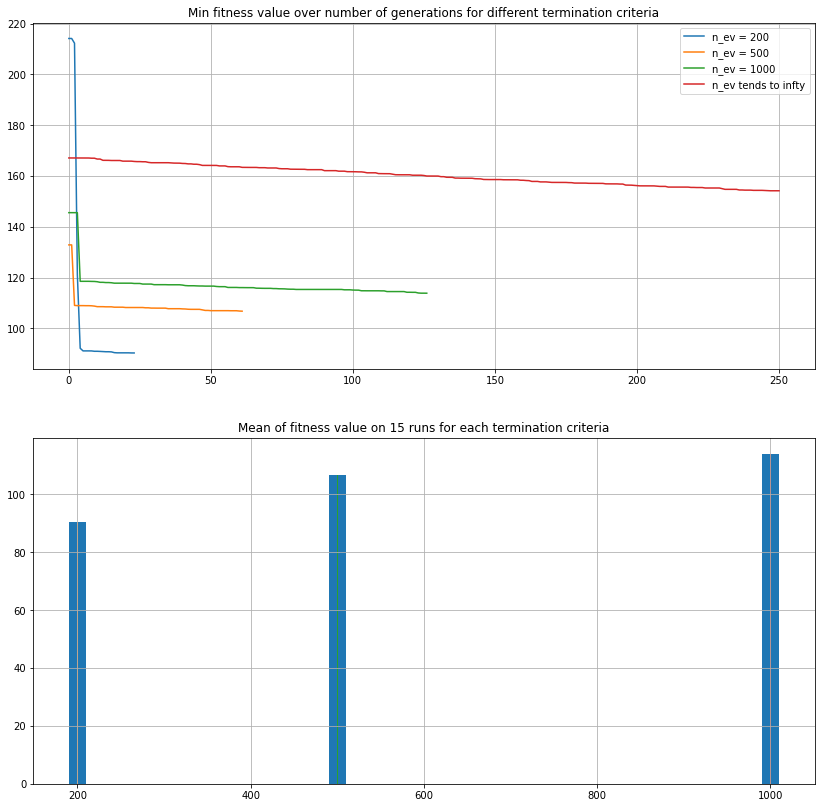

In [12]:
min_values = [GA_exe[1][i]['min'] for i in range(len(GA_exe[1]))]
ngen = [i for i in range(len(GA_exe[1]))]
min_values2 = [GA_exe2[1][i]['min'] for i in range(len(GA_exe2[1]))]
ngen2 = [i for i in range(len(GA_exe2[1]))]
min_values3 = [GA_exe3[1][i]['min'] for i in range(len(GA_exe3[1]))]
ngen3 = [i for i in range(len(GA_exe3[1]))]
min_values4 = [GA_exe4[1][i]['min'] for i in range(len(GA_exe4[1]))]
ngen4 = [i for i in range(len(GA_exe4[1]))]



fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(14,14))
ax1.plot(ngen, min_values, label="n_ev = 200")
ax1.plot(ngen2, min_values2, label="n_ev = 500")
ax1.plot(ngen3, min_values3, label="n_ev = 1000")
ax1.plot(ngen4, min_values4, label="n_ev tends to infty")
ax1.grid()
ax1.set_title("Min fitness value over number of generations for different termination criteria")
ax1.legend()
ax2.bar((200,500,1000), means[0:3], width= 20)
ax2.bar(200, means[0])
ax2.bar(500, means[1])
ax2.bar(1000,means[2])
ax2.grid()
ax2.set_title("Mean of fitness value on 15 runs for each termination criteria")
plt.show()